In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
data_in_out_region = db['data_in_out_region']
data_in_out_region = data_in_out_region.find()
data_in_out_region = pd.DataFrame(data_in_out_region)
data_in_destination_type = db['data_in_destination_type']
data_in_destination_type = data_in_destination_type.find()
data_in_destination_type = pd.DataFrame(data_in_destination_type)


# 유입 지역 분포

In [5]:
data_in_out_region_gg = data_in_out_region.query("region_out=='경기'")
data_in_out_region_gw = data_in_out_region.query("region_out=='강원'")

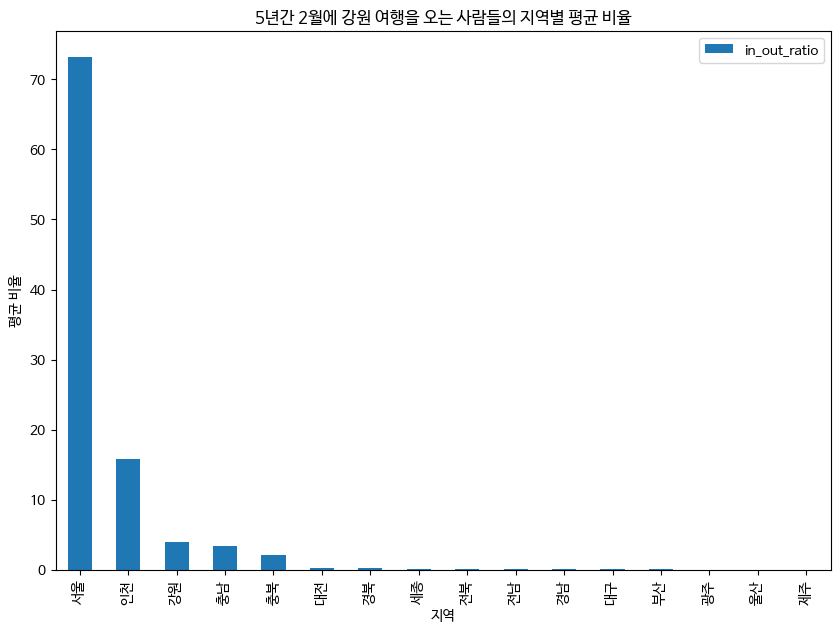

In [10]:
pivot_in_out_region_gg = pd.pivot_table(data_in_out_region_gg,index='region_in',values='in_out_ratio',aggfunc='mean')
pivot_in_out_region_gg = pivot_in_out_region_gg.sort_values("in_out_ratio",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_in_out_region_gg.plot(kind='bar', stacked=True, figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 2월에 강원 여행을 오는 사람들의 지역별 평균 비율')
plt.xlabel('지역')
plt.ylabel('평균 비율')

# 그래프 표시
plt.show()

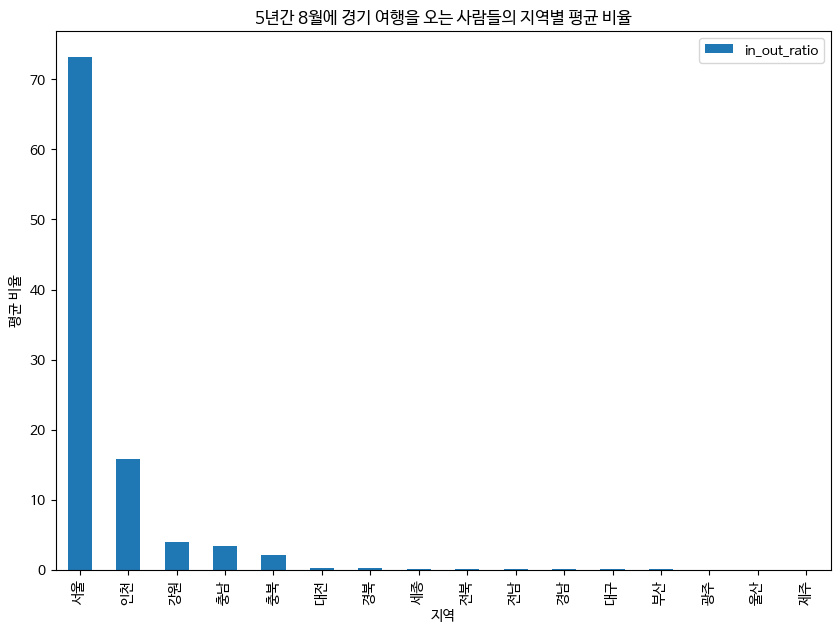

In [9]:
pivot_in_out_region_gw = pd.pivot_table(data_in_out_region_gw,index='region_in',values='in_out_ratio',aggfunc='mean')
pivot_in_out_region_gw = pivot_in_out_region_gw.sort_values("in_out_ratio",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_in_out_region_gg.plot(kind='bar', stacked=True, figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 8월에 경기 여행을 오는 사람들의 지역별 평균 비율')
plt.xlabel('지역')
plt.ylabel('평균 비율')

# 그래프 표시
plt.show()

# 유입 유형 분포

In [15]:
data_in_destination_type_gg = data_in_destination_type.query("region=='경기'")
data_in_destination_type_gw = data_in_destination_type.query("region=='강원'")

In [19]:
data_in_destination_type_gw

,_id,region,cate_major,cate_minor,search,year
205,664717b72581fd20a9efcc8c,강원,숙박,호텔,4520,2019
206,664717b72581fd20a9efcc8d,강원,숙박,호스텔,611,2019
207,664717b72581fd20a9efcc8e,강원,숙박,펜션/민박,101,2019
208,664717b72581fd20a9efcc8f,강원,숙박,콘도미니엄,37182,2019
209,664717b72581fd20a9efcc90,강원,숙박,캠핑,934,2019
...,...,...,...,...,...,...
406,664717b72581fd20a9efcd55,강원,쇼핑,전문매장/상가,2,2023
407,664717b72581fd20a9efcd56,강원,쇼핑,시장,3566,2023
408,664717b72581fd20a9efcd57,강원,쇼핑,쇼핑몰,70,2023
409,664717b72581fd20a9efcd58,강원,체험관광,농/산/어촌체험,296,2023


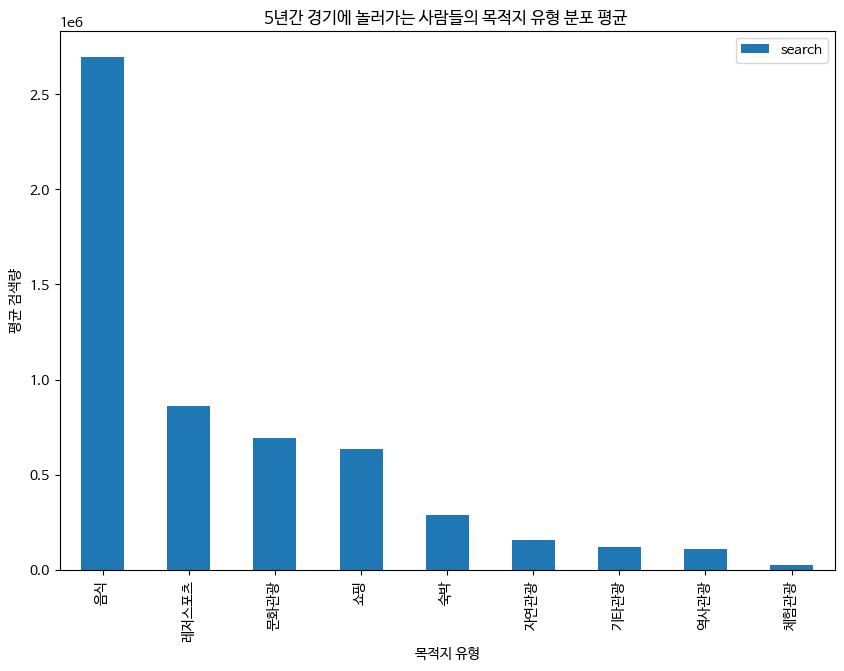

In [27]:
pivot_in_destination_type_gg = pd.pivot_table(data_in_destination_type_gg,index='cate_major',values='search',aggfunc='sum')
pivot_in_destination_type_gg = pivot_in_destination_type_gg.sort_values("search",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_in_destination_type_gg.plot(kind='bar', stacked=True, figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 경기에 놀러가는 사람들의 목적지 유형 분포 평균 ')
plt.xlabel('목적지 유형')
plt.ylabel('평균 검색량')

# 그래프 표시
plt.show()

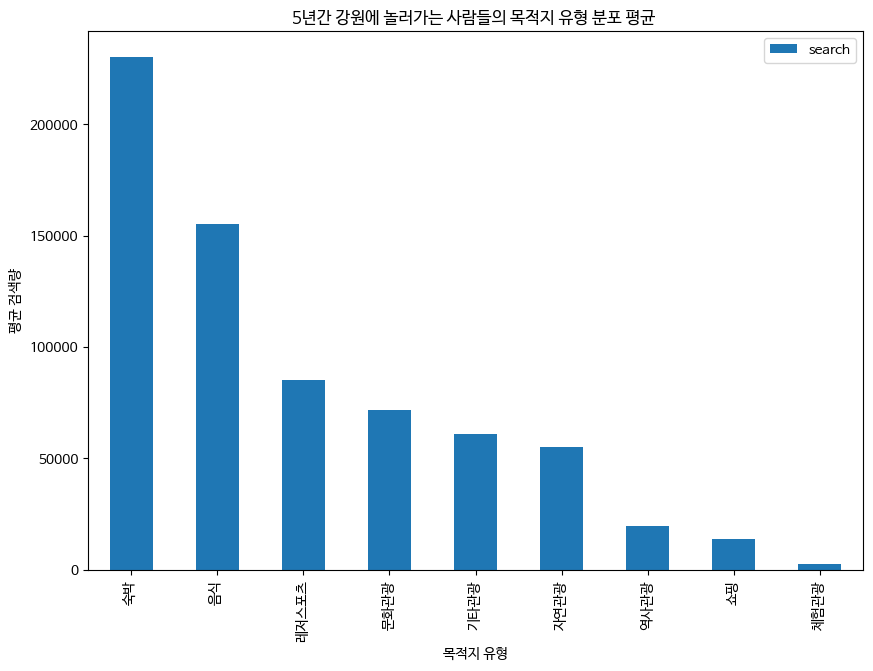

In [26]:
pivot_in_destination_type_gw = pd.pivot_table(data_in_destination_type_gw,index='cate_major',values='search',aggfunc='sum')
pivot_in_destination_type_gw = pivot_in_destination_type_gw.sort_values("search",ascending=False)
# 선 그래프 그리기
# concept 값이 0인 행 제거
pivot_in_destination_type_gw.plot(kind='bar', stacked=True, figsize=(10, 7))

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('5년간 강원에 놀러가는 사람들의 목적지 유형 분포 평균 ')
plt.xlabel('목적지 유형')
plt.ylabel('평균 검색량')

# 그래프 표시
plt.show()

In [244]:
pivot_members_sex

value,남자,여자
days,,
당일,16.672222,16.666667
숙박,17.652941,17.647059


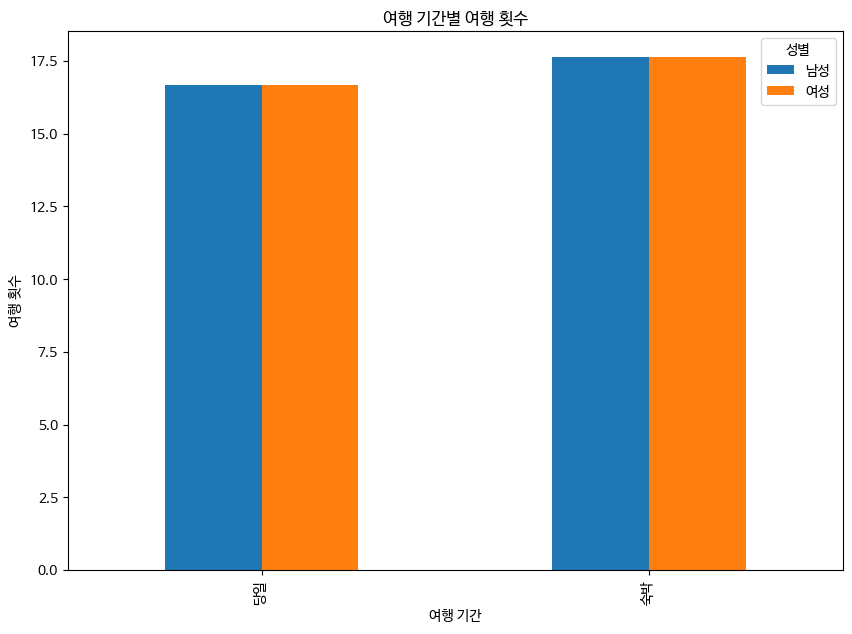

In [243]:
df_members_sex = df_members.query("classification == '성별'")
pivot_members_sex = pd.pivot_table(data=df_members_sex, index='days',columns=['value'],values='visitor_ratio',aggfunc='mean')
ax = pivot_members_sex.plot(kind='bar',  figsize=(10, 7))
plt.title('여행 기간별 여행 횟수')
plt.xlabel('여행 기간')
plt.ylabel('여행 횟수')
ax.legend(title="성별", loc='upper right', labels=['남성', '여성'])

plt.show()

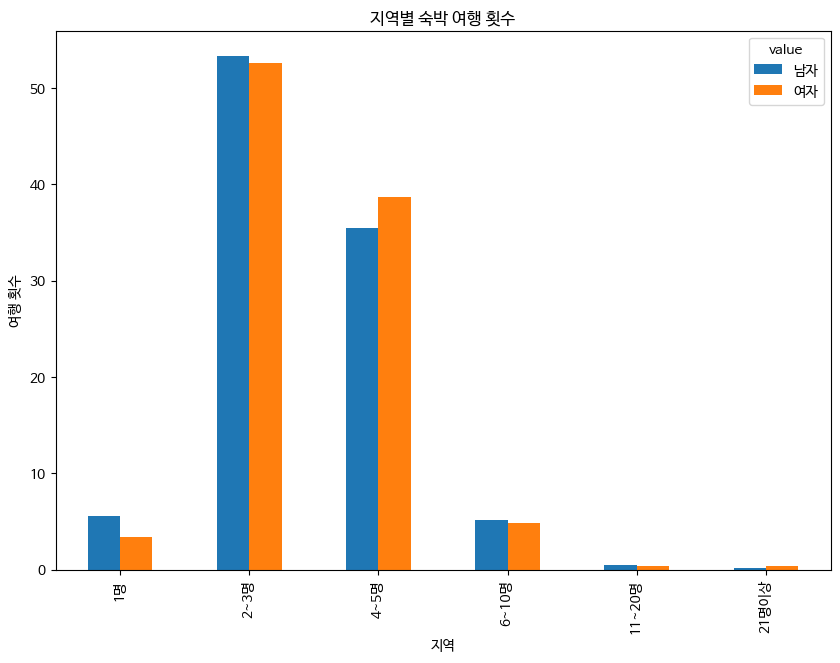

In [242]:
pivot_members_sex_accommodation = pd.pivot_table(data=df_members_sex.query("days=='숙박'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_accommodation
pivot_members_sex_accommodation = pivot_members_sex_accommodation.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_accommodation.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

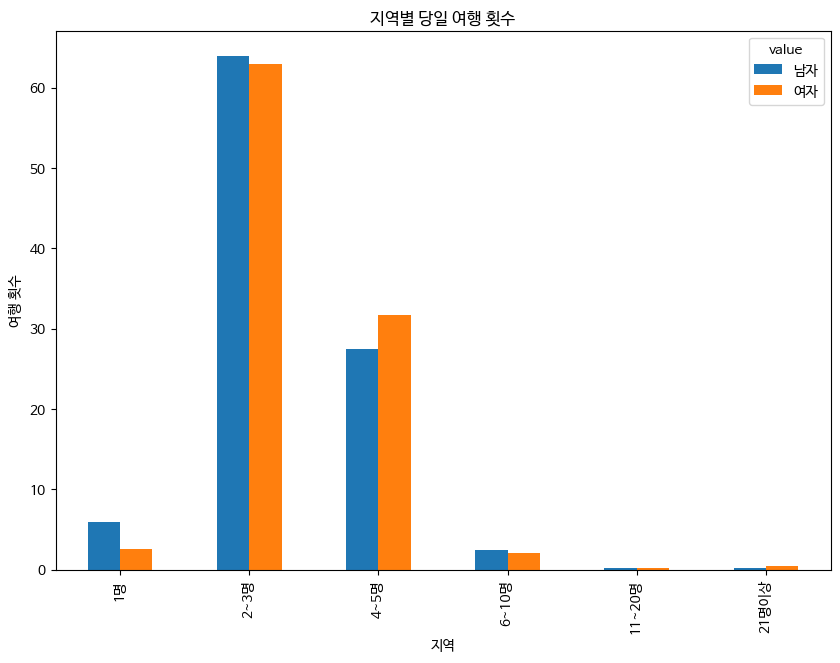

In [241]:
pivot_members_sex_day = pd.pivot_table(data=df_members_sex.query("days=='당일'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_day
pivot_members_sex_day = pivot_members_sex_day.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_day.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 당일 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()